<a href="https://colab.research.google.com/github/yeesem/Advanced-Tensorflow-Specialization/blob/main/Fast_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

# Utilities

In [17]:
def tensor_to_image(tensor):
  tensor_shape = tf.shape(tensor)
  number_elem_shape = tf.shape(tensor_shape)

  if number_elem_shape > 3:
    assert tensor_shape[0] == 1
    tensor = tensor[0]
  return tf.keras.preprocessing.image.array_to_img(tensor)

def load_img(path_to_img):
  max_dim = 512
  image = tf.io.read_file(path_to_img)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image,tf.float32)

  shape = tf.shape(image)[:-1]
  shape = tf.cast(shape,tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale,tf.int32)

  image = tf.image.resize(image,new_shape)
  image = image[tf.newaxis,:]
  image = tf.image.convert_image_dtype(image,tf.uint8)

  return image

def load_images(content_path,style_path):
  content_image = load_img("{}".format(content_path))
  style_image = load_img("{}".format(style_path))

  return content_image,style_image

def imshow(image,title = None):
  if len(image.shape) > 3:
    image = tf.squeeze(image,axis = 0)

  plt.imshow(image)
  if title:
    plt.title(title)

def show_images_with_objects(images,titles = []):
  if len(images) != len(titles):
    return

  plt.figure(figsize = (20,12))
  for idx,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(1,len(images),idx + 1)
    plt.xticks([])
    plt.yticks([])
    imshow(image,title)

# Download the images

In [1]:
IMAGE_DIR = 'images'

# create directory
!mkdir {IMAGE_DIR}

# download images to the directory you just created
!wget -q -O ./images/cafe.jpg https://cdn.pixabay.com/photo/2018/07/14/15/27/cafe-3537801_1280.jpg
!wget -q -O ./images/swan.jpg https://cdn.pixabay.com/photo/2017/02/28/23/00/swan-2107052_1280.jpg
!wget -q -O ./images/tnj.jpg https://i.dawn.com/large/2019/10/5db6a03a4c7e3.jpg
!wget -q -O ./images/rudolph.jpg https://cdn.pixabay.com/photo/2015/09/22/12/21/rudolph-951494_1280.jpg
!wget -q -O ./images/dynamite.jpg https://cdn.pixabay.com/photo/2015/10/13/02/59/animals-985500_1280.jpg
!wget -q -O ./images/painting.jpg https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg

print("image files you can choose from: ")
!ls images

image files you can choose from: 
cafe.jpg  dynamite.jpg	painting.jpg  rudolph.jpg  swan.jpg  tnj.jpg


In [2]:
# Set default images
content_path = f"{IMAGE_DIR}/swan.jpg"
style_path = f"{IMAGE_DIR}/painting.jpg"

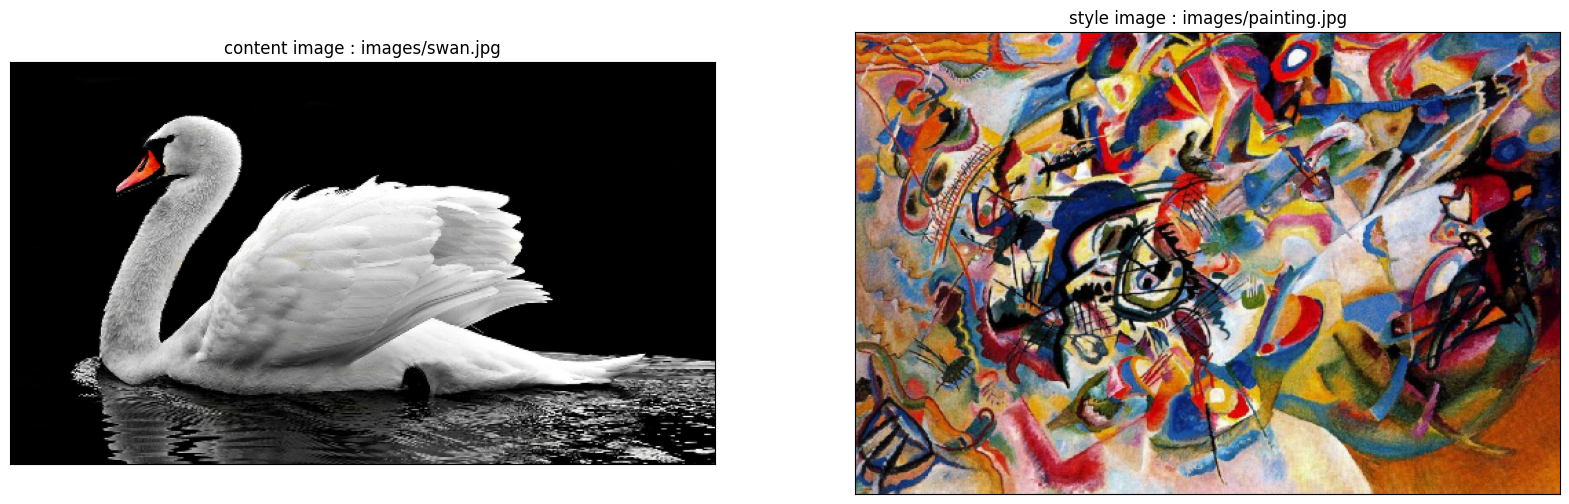

In [10]:
# Display the content and style image
content_image,style_image = load_images(content_path,style_path)
show_images_with_objects(
    [content_image,style_image],
    titles = [f'content image : {content_path}',
              f'style image : {style_path}']
)

# Download the model

In [6]:
# this will take a few minutes to load
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize the content image

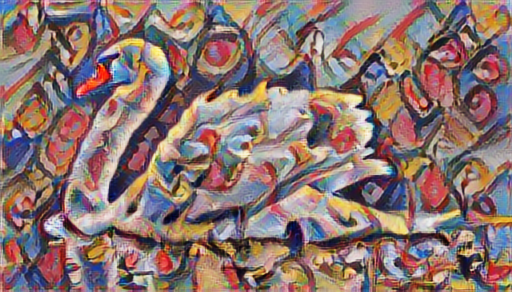

In [18]:
# Stylize the image using the model you just downloaded
stylized_image = hub_module(
    tf.image.convert_image_dtype(content_image,tf.float32),
    tf.image.convert_image_dtype(style_image,tf.float32)
)[0]

# Convert the tensor to image
tensor_to_image(stylized_image)